In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')  # 사용할 폰트 선택

import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

In [4]:
data = pd.read_csv('train.csv')

In [5]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# 데이터 이해 EDA

### 데이터 프레임 상위 행 5개 확인

In [6]:
data.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


- ID : 과수나무 고유 ID
- 착과량(int) : 실제 감귤 착과량 (Target)
- 나무 생육 상태 Features (5개)
- 수고(m), 수관폭1(min), 수관폭2(max), 수관폭평균(수관폭1과 수관폭2의 평균)

- 데이터 기입은 cm 단위

- 새순 Features (89개)
- 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 새순 데이터

- 엽록소 Features (89개)
- 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 엽록소 데이터

### 데이터 프레임 정보 확인

In [7]:
data.info() # 전체 컬럼 수 184개, 행 수 2207개, float형 182개, int형 1개(착과량), obj형 1개(ID)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


### 결측치 확인

In [8]:
data.isna().sum().sum() #전체 데이터 프레임의 결측치 개수 0개 확인

0

### 데이터 프레임 기초 통계량 확인

In [9]:
data.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


### 전체 데이터 프레임의 착과량,수고,수관폭1,수관폭2,수관폭평균의 시각화 및 기초통계량

In [10]:
data_vis_5 = data[['착과량(int)','수고(m)','수관폭1(min)','수관폭2(max)','수관폭평균']]

In [11]:
data_vis_5.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211
std,218.978302,35.88914,66.327994,68.862898,64.859684
min,1.000000,95.00000,95.000000,123.000000,109.000000
25%,221.000000,223.00000,271.500000,313.500000,294.000000
50%,404.000000,243.00000,316.000000,364.000000,340.500000
75%,593.500000,267.00000,361.000000,402.000000,380.000000
max,799.000000,381.00000,559.000000,584.000000,571.500000


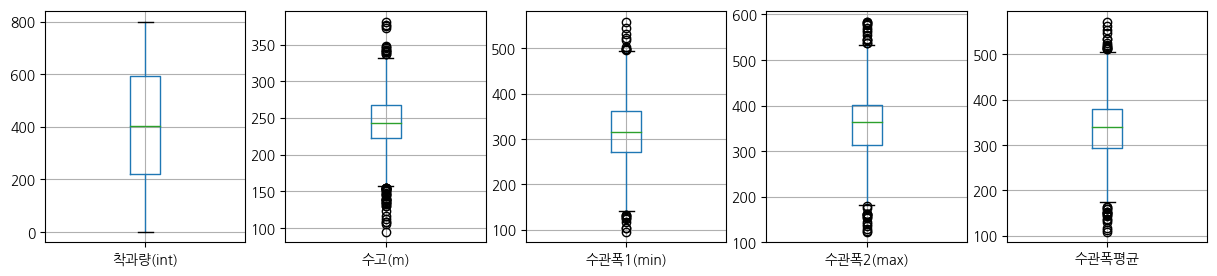

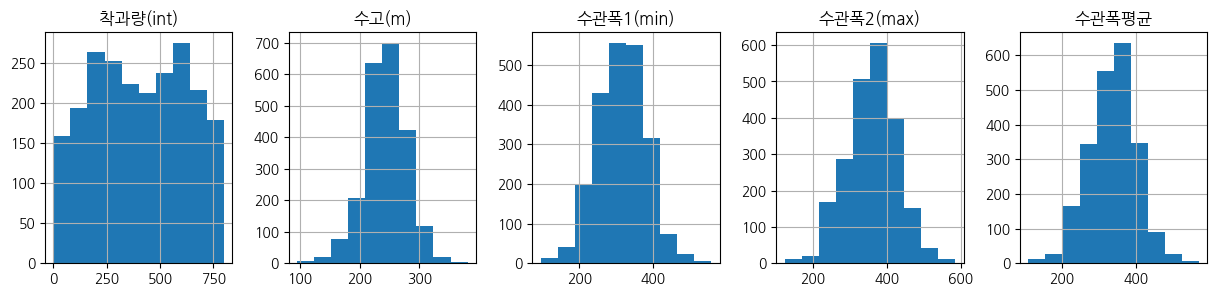

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(15,3))
for i in range(data_vis_5.shape[1]):
    data_vis_5.boxplot(column=data_vis_5.columns[i],grid=True,ax=axes[i])
plt.show()
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(15,3))
for i in range(data_vis_5.shape[1]):
    data_vis_5.hist(column=data_vis_5.columns[i],grid=True,ax=axes[i])
plt.show()


### 착과량 상위 25%와 하위 25% 행 표본 추출 후 경향성 비교

In [13]:
data_desc=data.sort_values(by='착과량(int)',ascending=False) #내림차순으로 정렬한 데이터 프레임 선언

In [14]:
data_desc_head = data_desc[data_desc['착과량(int)'] > data_desc['착과량(int)'].quantile(0.75)] # 착과량 상위 25%
data_desc_tail = data_desc[data_desc['착과량(int)'] < data_desc['착과량(int)'].quantile(0.25)] # 착과량 하위 25%

In [15]:
print('상위 25% : ',data_desc_head.shape)
print('하위 25% : ',data_desc_tail.shape)

상위 25% :  (552, 184)
하위 25% :  (551, 184)


In [16]:
arr = data_desc_head.describe().index+'_상위' # 상위 행의 기초통계량
data_desc_head_describe = data_desc_head.describe()
data_desc_head_describe.index = arr
arr = data_desc_tail.describe().index+'_하위' # 하위 행의 기초통계량
data_desc_tail_describe = data_desc_tail.describe()
data_desc_tail_describe.index = arr

In [17]:
data_desc_describe_compare = pd.concat([data_desc_head_describe,data_desc_tail_describe])

In [18]:
data_desc_describe_compare

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count_상위,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean_상위,687.978261,245.018116,316.056159,360.429348,338.242754,2.780072,2.756159,2.731341,2.705616,2.685688,...,68.950535,68.849938,68.752106,68.652352,68.551437,68.453008,68.354533,68.252443,68.150445,68.054069
std_상위,60.440274,34.490637,64.093246,67.396344,62.978894,0.228626,0.226065,0.220985,0.219604,0.217547,...,4.067464,4.067579,4.070705,4.071921,4.072060,4.072377,4.071328,4.075740,4.075389,4.080868
min_상위,594.000000,116.000000,132.000000,140.000000,136.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,56.510413,56.447737,56.360318,56.333902,56.304506,56.202133,56.165950,56.147860,55.989861,55.792547
25%_상위,634.000000,226.000000,271.000000,320.000000,295.000000,2.600000,2.600000,2.600000,2.500000,2.500000,...,66.243971,66.142365,66.061597,65.945161,65.847172,65.743805,65.666259,65.549039,65.485203,65.353162
50%_상위,680.500000,244.000000,319.000000,367.000000,346.250000,2.800000,2.800000,2.700000,2.700000,2.700000,...,69.114389,69.053767,68.932445,68.832713,68.724037,68.627653,68.463224,68.360617,68.289637,68.152953
75%_상위,741.000000,266.000000,361.000000,403.000000,379.500000,3.000000,2.900000,2.900000,2.900000,2.800000,...,71.558741,71.491204,71.401356,71.279377,71.207922,71.101185,71.007766,70.898849,70.807352,70.739854
max_상위,799.000000,347.000000,490.000000,556.000000,521.000000,3.400000,3.400000,3.400000,3.300000,3.300000,...,81.914395,81.759630,81.681890,81.659698,81.619791,81.562303,81.449868,81.441965,81.352314,81.201954
count_하위,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,...,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean_하위,123.212341,244.283122,313.912886,355.756806,334.834846,4.749365,4.701089,4.652087,4.603085,4.552813,...,69.242668,69.141702,69.040444,68.939972,68.844190,68.742734,68.641265,68.538179,68.435662,68.336276


### 상위,하위 착과량 df의 나무정보 컬럼, 새순 컬럼, 엽록소 컬럼 별 시각화

In [19]:
cp = '착과량(int)	수고(m)	수관폭1(min)	수관폭2(max)	수관폭평균'
cp_to_arr = cp.split()
tree_info_describe_compare = data_desc_describe_compare[cp_to_arr]

In [20]:
data_desc_tail_describe.index

Index(['count_하위', 'mean_하위', 'std_하위', 'min_하위', '25%_하위', '50%_하위', '75%_하위',
       'max_하위'],
      dtype='object')

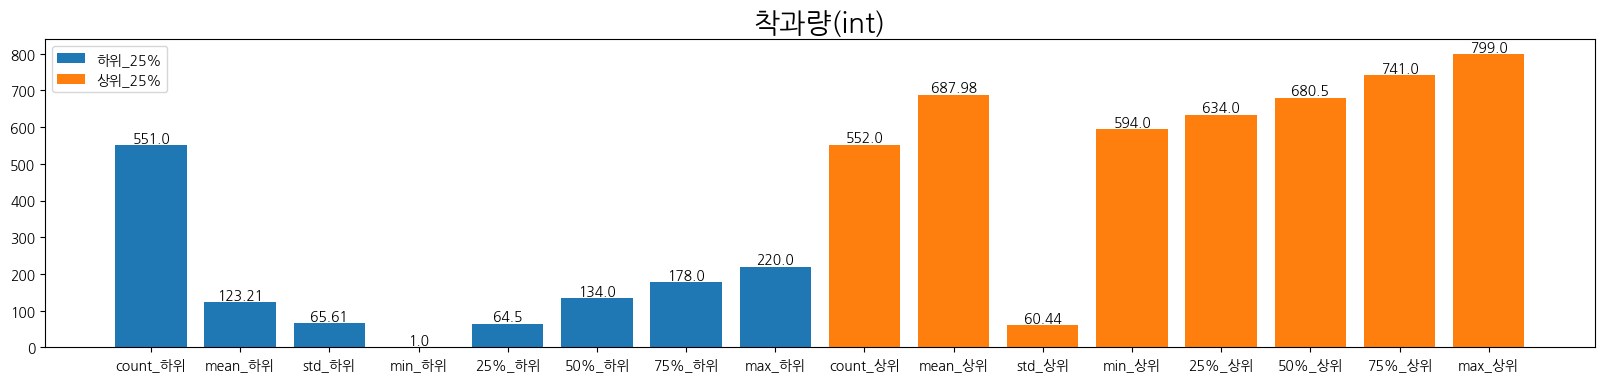

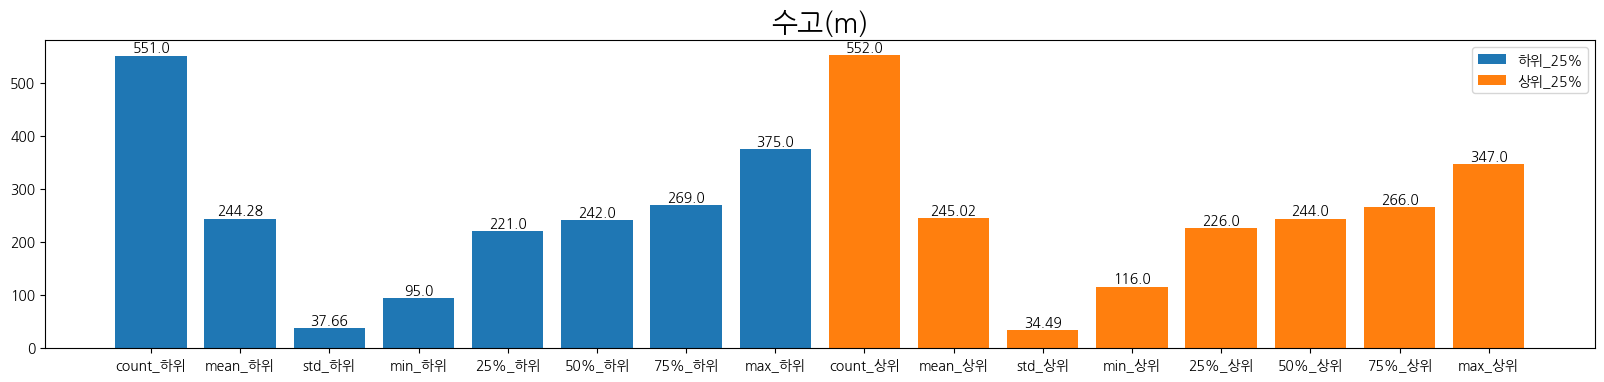

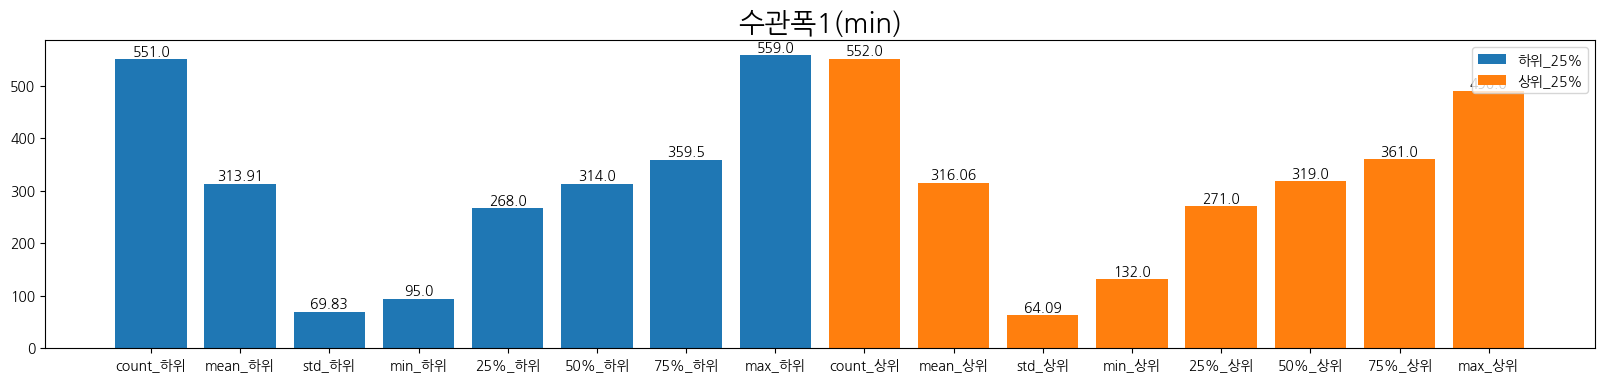

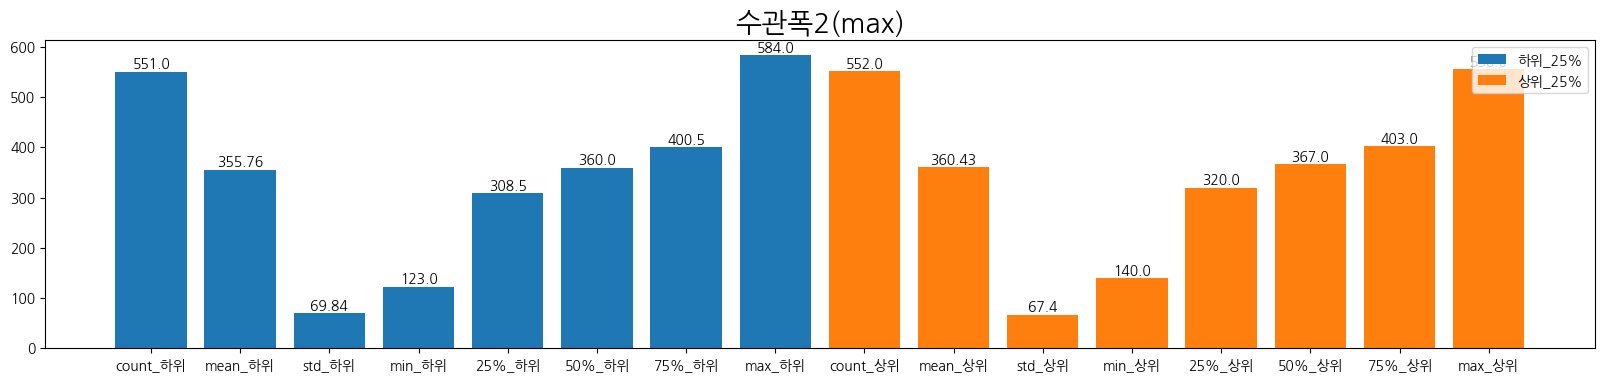

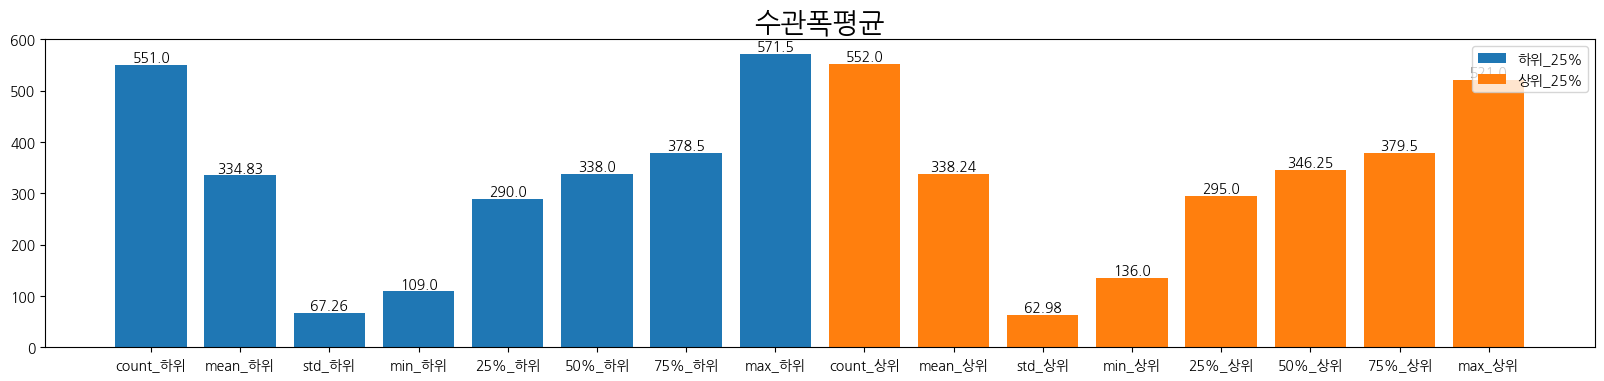

In [21]:
for i in cp_to_arr:
    plt.figure(figsize=(20,4))
    tail = plt.bar(x=data_desc_tail_describe.index,height=data_desc_tail_describe[i])
    head = plt.bar(x=data_desc_head_describe.index,height=data_desc_head_describe[i])
    for bar in tail:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')
    for bar in head:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')
    plt.title(i,fontdict={'fontsize':20})
    plt.legend(['하위_25%','상위_25%'])
    plt.show()


### 나무 데이터 비교
- 수관폭 평균과 수고의 평균값, 중앙값 모두 상위 착과량 데이터가 더 크나, 약 1%내외의 차이를 보여준다.
- 착과량 이외의 자료는 이상치가 존재하기 때문에 최상위, 최하위 데이터를 통해 객관적인 차이를 확인할 수 없다.

### 상위,하위 데이터프레임의 평균 새순 데이터  변화 시각화

In [22]:
arr = data_desc.columns # 새순 컬럼 추출
collect_arr = []
for i in arr:
    if '새순' in i :
        collect_arr.append(i)
data_desc_head_saesoon_mean = data_desc_head[collect_arr].mean() # 상위 새순 평균 데이터 추출
data_desc_tail_saesoon_mean = data_desc_tail[collect_arr].mean() # 하위 새순 평균 데이터 추출
data_desc_head_saesoon_median = data_desc_head[collect_arr].median() # 상위 새순 평균 데이터 추출
data_desc_tail_saesoon_median = data_desc_tail[collect_arr].median() # 하위 새순 평균 데이터 추출

In [23]:
data_desc_saesoon_mean_comp = pd.DataFrame()
data_desc_saesoon_mean_comp = data_desc_saesoon_mean_comp.append(data_desc_head_saesoon_mean,ignore_index=True)
data_desc_saesoon_mean_comp = data_desc_saesoon_mean_comp.append(data_desc_tail_saesoon_mean,ignore_index=True)
data_desc_saesoon_mean_comp.index = ['상위','하위'] # 새순 상위,하위 데이터 프레임 선언

In [24]:
data_desc_saesoon_median_comp = pd.DataFrame()
data_desc_saesoon_median_comp = data_desc_saesoon_median_comp.append(data_desc_head_saesoon_median,ignore_index=True)
data_desc_saesoon_median_comp = data_desc_saesoon_median_comp.append(data_desc_tail_saesoon_median,ignore_index=True)
data_desc_saesoon_median_comp.index = ['상위','하위'] # 새순 상위,하위 데이터 프레임 선언

In [25]:
data_desc_saesoon_mean_comp

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
상위,2.780072,2.756159,2.731341,2.705616,2.685688,2.655797,2.634783,2.610688,2.586594,2.560507,...,0.867391,0.847283,0.820109,0.794203,0.773007,0.748732,0.723370,0.695471,0.670290,0.643297
하위,4.749365,4.701089,4.652087,4.603085,4.552813,4.505082,4.454628,4.403993,4.355535,4.307078,...,0.864247,0.815608,0.767151,0.716697,0.668058,0.611978,0.521234,0.364973,0.161343,0.041379


In [26]:
data_desc_saesoon_median_comp # 상위,하위 착과량 별 새순 비교 데이터프레임

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
상위,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7
하위,4.7,4.7,4.7,4.6,4.6,4.5,4.5,4.4,4.4,4.3,...,0.9,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0


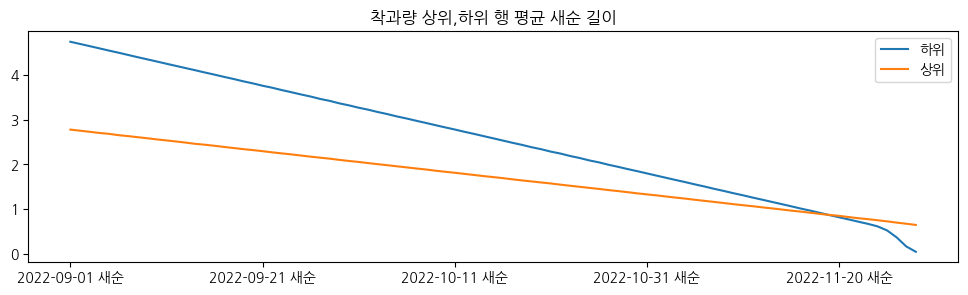

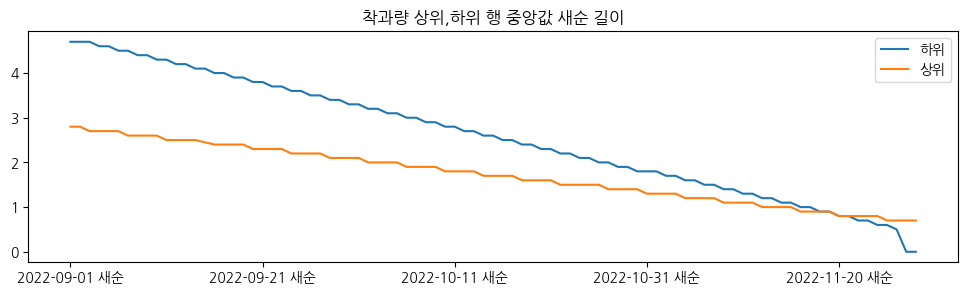

In [101]:
plt.figure(figsize=(12,3))
data_desc_tail_saesoon_mean.plot(kind='line')
data_desc_head_saesoon_mean.plot(kind='line')
plt.title('착과량 상위,하위 행 평균 새순 길이')
plt.legend(['하위','상위'])
plt.show()
plt.figure(figsize=(12,3))
data_desc_tail_saesoon_median.plot(kind='line')
data_desc_head_saesoon_median.plot(kind='line')
plt.title('착과량 상위,하위 행 중앙값 새순 길이')
plt.legend(['하위','상위'])
plt.show()

#### 새순 길이 변화 비교
- 하위 착과량 데이터는 시간이 변할수록 새순의 변화 폭이 크다.
- 새순의 크기가 급격히 줄어드는 구간이 존재한다.
- 측정 시작 기간의 새순 길이는 하위권 착과량 데이터가 더 크다.
- 측정 종료 기간의 새순 길이는 상위권 착과량 데이터가 더 크다

### 상위,하위 데이터프레임의 평균 엽록소 데이터의 계절 별 변화 시각화

In [29]:
arr = data_desc.columns # 엽록소 컬럼 추출
collect_arr = []
for i in arr:
    if '엽록소' in i :
        collect_arr.append(i)
data_desc_head_yeup_mean = data_desc_head[collect_arr].mean() # 상위 엽록소 평균 데이터 추출
data_desc_tail_yeup_mean = data_desc_tail[collect_arr].mean() # 하위 엽록소 평균 데이터 추출
data_desc_head_yeup_median = data_desc_head[collect_arr].median() # 상위 엽록소 평균 데이터 추출
data_desc_tail_yeup_median = data_desc_tail[collect_arr].median() # 하위 엽록소 평균 데이터 추출

In [30]:
data_desc_yeup_mean_comp = pd.DataFrame()
data_desc_yeup_mean_comp = data_desc_yeup_mean_comp.append(data_desc_head_yeup_mean,ignore_index=True)
data_desc_yeup_mean_comp = data_desc_yeup_mean_comp.append(data_desc_tail_yeup_mean,ignore_index=True)
data_desc_yeup_mean_comp.index = ['상위','하위'] # 새순 상위,하위 데이터 프레임 선언

In [31]:
data_desc_yeup_mean_comp = data_desc_yeup_mean_comp.append(data_desc_yeup_mean_comp.loc['상위',:]-data_desc_yeup_mean_comp.loc['하위',:],ignore_index=True)
data_desc_yeup_mean_comp.index = ['상위','하위','평균차']

In [32]:
data_desc_yeup_median_comp = pd.DataFrame()
data_desc_yeup_median_comp = data_desc_yeup_median_comp.append(data_desc_head_yeup_median,ignore_index=True)
data_desc_yeup_median_comp = data_desc_yeup_median_comp.append(data_desc_tail_yeup_median,ignore_index=True)
data_desc_yeup_median_comp.index = ['상위','하위'] # 새순 상위,하위 데이터 프레임 선언

In [33]:
data_desc_yeup_median_comp = data_desc_yeup_median_comp.append(data_desc_yeup_median_comp.loc['상위',:]-data_desc_yeup_median_comp.loc['하위',:],ignore_index=True)
data_desc_yeup_median_comp.index = ['상위','하위','중앙값차']

In [34]:
data_desc_yeup_median_comp

,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
상위,76.984861,76.885981,76.789552,76.679759,76.608923,76.510523,76.388871,76.297833,76.216939,76.108319,...,69.114389,69.053767,68.932445,68.832713,68.724037,68.627653,68.463224,68.360617,68.289637,68.152953
하위,77.039844,76.926707,76.793138,76.708559,76.589067,76.548801,76.431579,76.367118,76.195609,76.090872,...,69.122979,69.028770,68.937023,68.812107,68.723876,68.620103,68.542824,68.407855,68.328073,68.247520
중앙값차,-0.054983,-0.040726,-0.003586,-0.028800,0.019856,-0.038278,-0.042708,-0.069286,0.021330,0.017447,...,-0.008590,0.024996,-0.004578,0.020606,0.000160,0.007550,-0.079600,-0.047238,-0.038437,-0.094568


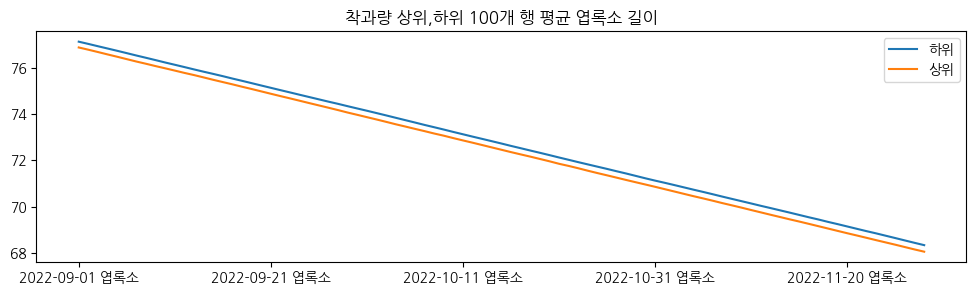

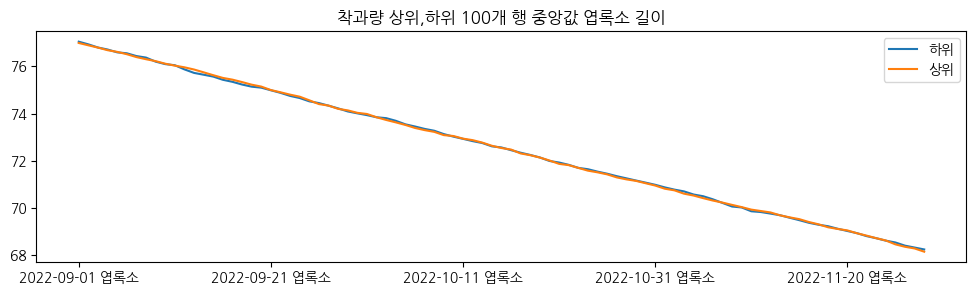

In [35]:
plt.figure(figsize=(12,3))
data_desc_tail_yeup_mean.plot(kind='line')
data_desc_head_yeup_mean.plot(kind='line')
plt.title('착과량 상위,하위 100개 행 평균 엽록소 길이')
plt.legend(['하위','상위'])
plt.show()
plt.figure(figsize=(12,3))
data_desc_tail_yeup_median.plot(kind='line')
data_desc_head_yeup_median.plot(kind='line')
plt.title('착과량 상위,하위 100개 행 중앙값 엽록소 길이')
plt.legend(['하위','상위'])
plt.show()

In [36]:
data_desc_yeup_mean_comp

,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
상위,76.870570,76.773926,76.673242,76.570295,76.470026,76.366527,76.263429,76.167012,76.065866,75.970352,...,68.950535,68.849938,68.752106,68.652352,68.551437,68.453008,68.354533,68.252443,68.150445,68.054069
하위,77.120324,77.023786,76.923792,76.825795,76.727015,76.625554,76.523312,76.424561,76.324271,76.221141,...,69.242668,69.141702,69.040444,68.939972,68.844190,68.742734,68.641265,68.538179,68.435662,68.336276
평균차,-0.249754,-0.249859,-0.250550,-0.255500,-0.256988,-0.259027,-0.259883,-0.257549,-0.258405,-0.250789,...,-0.292133,-0.291765,-0.288338,-0.287620,-0.292753,-0.289726,-0.286732,-0.285736,-0.285217,-0.282207


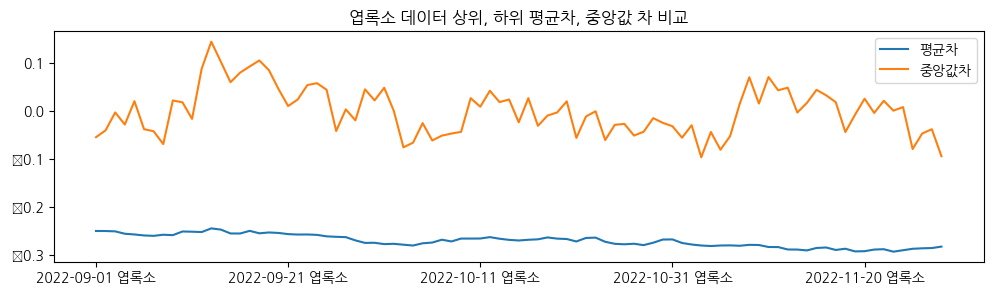

In [37]:
plt.figure(figsize=(12,3))
data_desc_yeup_mean_comp.loc['평균차',:].plot(kind='line')
data_desc_yeup_median_comp.loc['중앙값차',:].plot(kind='line')
plt.title('엽록소 데이터 상위, 하위 평균차, 중앙값 차 비교')
plt.legend(['평균차','중앙값차'])
plt.show()

#### 엽록소 변화 비교
- 상위, 하위권 엽록소의 변화량이 큰 차이를 보이지 않는다.
- 중앙값은 서로 값의 차이가 거의 없으나 평균값의 경우 상위권 착과량 데이터가 소폭 작다.
- 상위, 하위권 엽록소의 평균차 데이터는 큰 변화가 없으나, 시간이 지남에 따라 소폭 차이가 늘어나는 경향이 있다.
- 상위, 하위권 엽록소의 중앙값 차 데이터는 경향을 확인하기 어렵다.

# 착과량 상관관계 분석

In [138]:
abs_head_cor = np.abs(data_desc_head.corr()['착과량(int)']).sort_values(ascending=False)

In [148]:
pd.DataFrame(abs_head_cor)
# 상위 데이터

,착과량(int)
착과량(int),1.000000
2022-09-07 새순,0.755568
2022-09-01 새순,0.754052
2022-09-10 새순,0.753206
2022-09-06 새순,0.752595
...,...
2022-09-03 엽록소,0.007097
2022-09-05 엽록소,0.006967
2022-09-04 엽록소,0.006574
2022-09-01 엽록소,0.006393


In [144]:
abs_tail_cor = np.abs(data_desc_tail.corr()['착과량(int)']).sort_values(ascending=False)

In [145]:
pd.DataFrame(abs_tail_cor)

,착과량(int)
착과량(int),1.000000
2022-09-06 새순,0.828977
2022-09-08 새순,0.826385
2022-09-10 새순,0.825461
2022-09-04 새순,0.824001
...,...
2022-09-04 엽록소,0.021896
2022-09-03 엽록소,0.021403
수관폭평균,0.007226
수관폭1(min),0.007052


1. 11월 초 까지의 새순 데이터가 착과량에 영향을 주는 것으로 추정됨.
2. 엽록소 데이터와 나무 데이터는 큰 영향을 미치지 않는 것으로 추정됨.
3. 11월 말 새순 데이터는 착과량에 어느 정도 영향을 미치는 것으로 추정됨.

# 데이터 피처 엔지니어링

In [41]:
df = data
df.drop('ID',axis=1,inplace=True)

### 첫 번째 피처
#### : 종속변수와 상관관계가 0.85 이상인 변수만을 가진 데이터 프레임 생성

In [42]:
high_features = df.corr().abs().sort_values(by='착과량(int)',ascending=False).iloc[:,:1]
high_features_over_85 = high_features[high_features['착과량(int)']>=.85].index
feature_1 = df[high_features_over_85]
feature_1.head()

,착과량(int),2022-09-06 새순,2022-09-07 새순,2022-09-01 새순,2022-09-04 새순,2022-09-02 새순,2022-09-10 새순,2022-09-03 새순,2022-09-05 새순,2022-09-09 새순,...,2022-10-30 새순,2022-10-31 새순,2022-11-01 새순,2022-11-02 새순,2022-11-03 새순,2022-11-04 새순,2022-11-05 새순,2022-11-06 새순,2022-11-07 새순,2022-11-08 새순
0,692,2.7,2.6,2.8,2.7,2.8,2.6,2.7,2.7,2.6,...,1.3,1.3,1.2,1.2,1.2,1.2,1.2,1.1,1.1,1.1
1,534,3.1,3.1,3.3,3.2,3.3,3.0,3.3,3.2,3.0,...,1.4,1.4,1.3,1.3,1.3,1.2,1.2,1.2,1.1,1.1
2,634,2.8,2.8,3.0,2.9,2.9,2.7,2.9,2.9,2.8,...,1.3,1.3,1.3,1.3,1.3,1.2,1.2,1.2,1.1,1.1
3,639,2.9,2.9,3.1,3.0,3.0,2.8,3.0,3.0,2.8,...,1.4,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.2
4,496,3.5,3.5,3.7,3.6,3.6,3.3,3.6,3.5,3.4,...,1.6,1.6,1.5,1.5,1.5,1.4,1.4,1.4,1.3,1.3


### 두 번째 피쳐
#### : 기존 feature의 정보를 요약한 feature을 추가한 데이터 프레임 생성

#### 수고, 수관폭, (새순, 엽록소의 월별) min,max,diff,mean

In [43]:
feature_2 = df.copy()

In [44]:
feature_2.head()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,3.5,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [45]:
# 나무 정보 관련
feature_2['수고/수관폭(max)'] = feature_2['수고(m)'] / feature_2['수관폭2(max)']
feature_2['수관폭(dif)'] = feature_2['수관폭2(max)'] - feature_2['수관폭1(min)']

----

새순

In [46]:
target_arr = [i for i in list(feature_2.columns) if '새순' in i]

In [47]:
arr = [i for i in range(0,89,7)]
arr.append(89)

In [48]:
target_arr = [i for i in list(feature_2.columns) if '새순' in i]

In [49]:
for i in arr:
    if i != 89:
        col_name = f'새순{i},{i+1}일차_mean'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].mean(axis=1)
        col_name = f'새순{i},{i+1}일차_min'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].min(axis=1)
        col_name = f'새순{i},{i+1}일차_max'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].max(axis=1)
        col_name = f'새순{i},{i+1}일차_sum'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].sum(axis=1)

In [50]:
col_name = f'새순1-89일차_mean'
feature_2[col_name] = feature_2[target_arr].iloc[:,:].mean(axis=1)
col_name = f'새순1-89일차_var'
feature_2[col_name] = feature_2[target_arr].iloc[:,:].var(axis=1)
col_name = f'새순1-89일차_std'
feature_2[col_name] = feature_2[target_arr].iloc[:,:].std(axis=1)

In [51]:
feature_2

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,"새순77,78일차_min","새순77,78일차_max","새순77,78일차_sum","새순84,85일차_mean","새순84,85일차_min","새순84,85일차_max","새순84,85일차_sum",새순1-89일차_mean,새순1-89일차_var,새순1-89일차_std
0,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,...,0.9,0.9,0.9,0.7,0.7,0.7,0.7,1.693258,0.407227,0.638143
1,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,...,0.8,0.8,0.8,0.5,0.5,0.5,0.5,1.861798,0.800115,0.894491
2,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,2.9,...,0.9,0.9,0.9,0.7,0.7,0.7,0.7,1.762921,0.507814,0.712611
3,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,0.8,0.8,0.8,0.8,1.857303,0.479974,0.692802
4,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,3.5,...,1.0,1.0,1.0,0.7,0.7,0.7,0.7,2.125843,0.806711,0.898171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,4.4,...,0.9,0.9,0.9,0.6,0.6,0.6,0.6,2.507865,1.558915,1.248565
2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,2.9,...,0.9,0.9,0.9,0.7,0.7,0.7,0.7,1.841573,0.507684,0.712519
2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,2.9,...,0.9,0.9,0.9,0.7,0.7,0.7,0.7,1.770787,0.523228,0.723345
2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,3.8,...,0.9,0.9,0.9,0.7,0.7,0.7,0.7,2.184270,1.042704,1.021129


----

In [52]:
target_arr = [i for i in list(feature_2.columns) if '엽록소' in i]

In [53]:
arr = [i for i in range(0,89,7)]
arr.append(89)

In [54]:
for i in arr:
    if i != 89:
        col_name = f'엽록소{i},{i+1}일차_mean'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].mean(axis=1)
        col_name = f'엽록소{i},{i+1}일차_min'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].min(axis=1)
        col_name = f'엽록소{i},{i+1}일차_max'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].max(axis=1)
        col_name = f'엽록소{i},{i+1}일차_sum'
        feature_2[col_name] = feature_2[target_arr].iloc[:,i:i+1].sum(axis=1)

In [55]:
col_name = f'엽록소 1-89일차_mean'
feature_2[col_name] = feature_2[target_arr].iloc[:,:].mean(axis=1)
col_name = f'엽록소 1-89일차_var'
feature_2[col_name] = feature_2[target_arr].iloc[:,:].var(axis=1)
col_name = f'엽록소 1-89일차_std'
feature_2[col_name] = feature_2[target_arr].iloc[:,:].std(axis=1)

In [56]:
target = '착과량(int)'

In [57]:
feature_2

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,"엽록소77,78일차_min","엽록소77,78일차_max","엽록소77,78일차_sum","엽록소84,85일차_mean","엽록소84,85일차_min","엽록소84,85일차_max","엽록소84,85일차_sum",엽록소 1-89일차_mean,엽록소 1-89일차_var,엽록소 1-89일차_std
0,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,2.7,...,70.996113,70.996113,70.996113,70.340491,70.340491,70.340491,70.340491,74.155836,5.894201,2.427798
1,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,3.2,...,71.593234,71.593234,71.593234,70.796630,70.796630,70.796630,70.796630,74.962123,7.917647,2.813831
2,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,2.9,...,71.481213,71.481213,71.481213,70.876723,70.876723,70.876723,70.876723,74.727999,6.134332,2.476758
3,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,3.0,...,70.129069,70.129069,70.129069,69.614644,69.614644,69.614644,69.614644,73.546210,6.978075,2.641605
4,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,3.5,...,68.377246,68.377246,68.377246,67.859963,67.859963,67.859963,67.859963,71.841067,6.982160,2.642378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,4.4,...,66.661502,66.661502,66.661502,66.008775,66.008775,66.008775,66.008775,69.822742,6.160248,2.481985
2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,2.9,...,73.670597,73.670597,73.670597,73.088750,73.088750,73.088750,73.088750,77.262155,7.188319,2.681104
2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,2.9,...,67.864188,67.864188,67.864188,66.933771,66.933771,66.933771,66.933771,71.165328,6.831096,2.613637
2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,3.8,...,67.032853,67.032853,67.032853,66.248731,66.248731,66.248731,66.248731,70.019605,5.649101,2.376784


In [58]:
feature_2.drop(list(df.columns),axis=1,inplace=True)

In [59]:
feature_2[target] = feature_1[target]

# 모델링
# stacking

In [60]:
from sklearn.model_selection import train_test_split
target = '착과량(int)'
x = feature_1.drop(target,axis=1)
y = feature_1.loc[:,target]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500,random_state=1,max_depth=5,max_features=15,n_jobs=6)
rf_model.fit(x_train,y_train)


RandomForestRegressor(max_depth=5, max_features=15, n_estimators=500, n_jobs=6,
                      random_state=1)

In [62]:
rf_pred=rf_model.predict(x_test)

In [63]:
print(mean_squared_error(y_test,rf_pred))

1375.0779857666193


----

In [64]:
x_1 = feature_2.drop(target,axis=1)
y_1 = feature_2.loc[:,target]

In [65]:
x_1_train,x_1_test,y_1_train,y_1_test = train_test_split(x_1,y_1,test_size=.3,random_state=1)

In [66]:
!pip install catboost

In [67]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(learning_rate=.066,n_estimate=4,max_depth=2,random_state=1,subsample=.7,colsample_bytree=.5)
xgb_model.fit(x_1_train,y_1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.066, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimate=4, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

----

In [68]:
xgb_pred = xgb_model.predict(x_1_test)

In [69]:
print(mean_squared_error(y_1_test,xgb_pred))

1472.968035071597


----

In [70]:
stack_arr = np.column_stack((rf_pred,xgb_pred))

In [71]:
stack_arr.shape

(663, 2)

In [72]:
y_test.shape

(663,)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
meta_model =RandomForestRegressor(n_estimators=1000,max_depth=25,random_state=1,max_features=.65)
meta_model.fit(stack_arr,y_test)
met = meta_model.predict(stack_arr)

In [75]:
r2 = r2_score(y_test,met)
mae = mean_absolute_error(y_test,met)
mse = mean_squared_error(y_test,met)
mape = mean_absolute_percentage_error(y_test,met)

In [76]:
print(mse)

228.929759259584


----

In [77]:
test_df = pd.read_csv('test.csv')

### 첫 번째 피처
#### : 종속변수와 상관관계가 0.85 이상인 변수만을 가진 데이터 프레임 생성

In [78]:
test_df_1 = test_df[list(feature_1.columns)[1:]]

### 두 번째 피쳐
#### : 기존 feature의 정보를 요약한 feature을 추가한 데이터 프레임 생성

#### 수고, 수관폭, (새순, 엽록소의 월별) min,max,diff,mean

In [79]:
test_df_2 = test_df.copy()

In [80]:
# 나무 정보 관련
test_df_2['수고/수관폭(max)'] = test_df_2['수고(m)'] / test_df_2['수관폭2(max)']
test_df_2['수관폭(dif)'] = test_df_2['수관폭2(max)'] - test_df_2['수관폭1(min)']

----

새순

In [81]:
target_arr = [i for i in list(test_df_2.columns) if '새순' in i]

In [82]:
arr = [i for i in range(0,89,7)]
arr.append(89)

In [83]:
for i in arr:
    if i != 89:
        col_name = f'새순{i},{i+1}일차_mean'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].mean(axis=1)
        col_name = f'새순{i},{i+1}일차_min'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].min(axis=1)
        col_name = f'새순{i},{i+1}일차_max'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].max(axis=1)
        col_name = f'새순{i},{i+1}일차_sum'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].sum(axis=1)

In [84]:
col_name = f'새순1-89일차_mean'
test_df_2[col_name] = test_df_2[target_arr].iloc[:,:].mean(axis=1)
col_name = f'새순1-89일차_var'
test_df_2[col_name] = test_df_2[target_arr].iloc[:,:].var(axis=1)
col_name = f'새순1-89일차_std'
test_df_2[col_name] = test_df_2[target_arr].iloc[:,:].std(axis=1)

----

In [85]:
target_arr = [i for i in list(test_df_2.columns) if '엽록소' in i]

In [86]:
arr = [i for i in range(0,89,7)]
arr.append(89)

In [87]:
for i in arr:
    if i != 89:
        col_name = f'엽록소{i},{i+1}일차_mean'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].mean(axis=1)
        col_name = f'엽록소{i},{i+1}일차_min'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].min(axis=1)
        col_name = f'엽록소{i},{i+1}일차_max'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].max(axis=1)
        col_name = f'엽록소{i},{i+1}일차_sum'
        test_df_2[col_name] = test_df_2[target_arr].iloc[:,i:i+1].sum(axis=1)

In [88]:
col_name = f'엽록소 1-89일차_mean'
test_df_2[col_name] = test_df_2[target_arr].iloc[:,:].mean(axis=1)
col_name = f'엽록소 1-89일차_var'
test_df_2[col_name] = test_df_2[target_arr].iloc[:,:].var(axis=1)
col_name = f'엽록소 1-89일차_std'
test_df_2[col_name] = test_df_2[target_arr].iloc[:,:].std(axis=1)

In [89]:
test_df_2.drop('ID',axis=1,inplace=True)

In [90]:
test_df_2.drop(test_df.columns[1:],axis=1,inplace=True)

----

In [91]:
stack_result_rf = rf_model.predict(test_df_1)

In [92]:
stack_result_xgb = xgb_model.predict(test_df_2)

In [93]:
stack_result = np.column_stack((stack_result_rf,stack_result_xgb))

In [94]:
result = meta_model.predict(stack_result)

In [95]:
stack_result.shape

(2208, 2)

In [96]:
result.shape

(2208,)

In [97]:
result

array([260.753, 755.024, 138.513, ..., 371.431, 276.911,  85.9  ])

---

In [98]:
result_2 = pd.read_csv('sample_submission.csv')

In [99]:
result_2['착과량(int)'] = result

In [100]:
result_2.to_csv('result_5',index=False)